In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss, classification_report

from  sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [2]:
df = pd.read_csv('Consumer_Complaints.csv')
df = df[~df['Consumer complaint narrative'].isnull()]
features = df[['Product', 'Consumer complaint narrative']]
features.columns = ['product', 'text']

In [3]:
features.loc[:, 'target'] = features['product'].factorize()[0].copy()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
category_id_df = features[['product', 'target']].drop_duplicates().sort_values('target')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['target', 'product']].values)

In [5]:
category_id_df.loc[category_id_df['target'] == 11, 'product'] = 'Money transfer'
category_id_df.loc[category_id_df['target'] == 12, 'product'] = 'Personal consumer reports'
category_id_df.loc[category_id_df['target'] == 17, 'product'] = 'All kindes of loans'

In [11]:
(data_train, data_test, y_train, y_test) = train_test_split(features['text'], features['target'], 
                                                      test_size=0.25, stratify=features['target'])

vect = TfidfVectorizer(stop_words='english')
X_train = vect.fit_transform(data_train)
X_test = vect.transform(data_test)

In [12]:
model = LinearSVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [10]:
print('ACCURACY:', accuracy_score(predictions, y_test))
print('PRECISION:', precision_score(predictions, y_test, average='macro'))
print('RECALL:', recall_score(predictions, y_test, average='macro'))
print(classification_report(y_test, predictions))

ACCURACY: 0.7367597292724196
PRECISION: 0.5204407721045833
RECALL: 0.6476399804437825
             precision    recall  f1-score   support

          0       0.67      0.59      0.63      7898
          1       0.57      0.51      0.54      2368
          2       0.80      0.87      0.83     16161
          3       0.89      0.95      0.92     11099
          4       0.61      0.68      0.64      4711
          5       0.39      0.10      0.15        73
          6       0.62      0.69      0.65      3722
          7       0.87      0.87      0.87      4234
          8       0.55      0.48      0.51       374
          9       0.50      0.34      0.41       437
         10       0.68      0.63      0.66       363
         11       0.79      0.61      0.69       820
         12       0.69      0.73      0.71     12821
         13       0.56      0.35      0.43      1711
         14       0.48      0.17      0.26       734
         15       0.53      0.37      0.43      2818
         16 

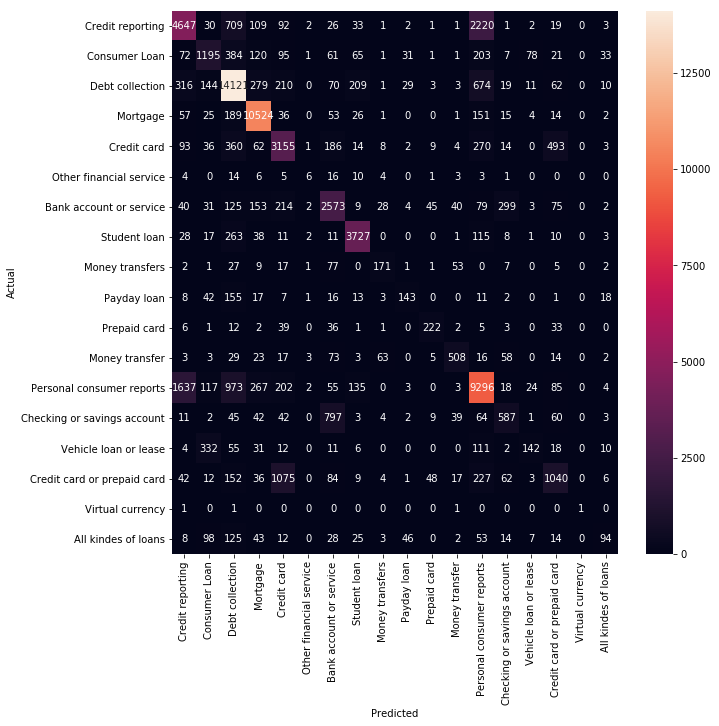

In [13]:
conf_mat = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df['product'].values, yticklabels=category_id_df['product'].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [28]:
y_test.head()

991149     3
508910     7
332601     0
153495     3
837461    12
Name: target, dtype: int64

In [44]:
index = 837461

In [45]:
id_to_category[model.predict(vect.transform([features.loc[index, 'text']]))[0]]

'Credit reporting, credit repair services, or other personal consumer reports'

In [46]:
id_to_category[features.loc[index, 'target']]

'Credit reporting, credit repair services, or other personal consumer reports'

In [47]:
features.loc[index, 'text']

'I made arrangements for credit card payments last year with  XXXX  and representatives advised that my credit would not be reported as " negative \'\' as long as I kept the arrangements. A  manager pretended to have listed to the phone calls were I was misleaded and now my credit report shows 120+ late  payments which could have been avoided if  XXXX  had provided correct information to me and reported the payments as agreed.  XXXX  reported late payments to credit bureaus when I was making payments under their payment plans.  XXXX  denied removing false data.'

In [ ]:
with open('model.pkl', 'wb') as output_file:
    pickle.dump(model, output_file)

In [ ]:
with open('vectorizer.pkl', 'wb') as output_file:
    pickle.dump(vect, output_file)